In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


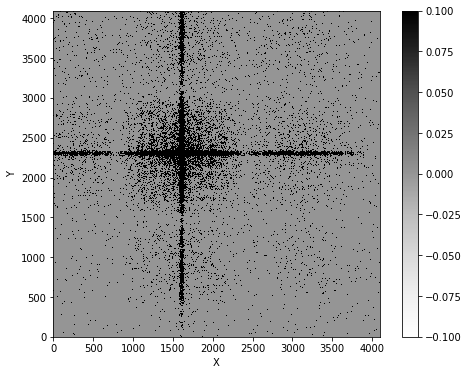

In [5]:
def image_data(table,center_x,center_y):
    x = np.array(table['X'])
    y = np.array(table['Y'])
    data=np.zeros([4096,4096])
    for i in range(len(x)):
        data[x[i]][y[i]] = data[x[i]][y[i]]+1
    new_data = np.zeros([4096,4096])
    shift_x = 1614.0-center_x
    shift_y = 2301.0-center_y
    for j in range(4096):
        if (j+shift_x) >= 0 and (j+shift_x) < 4096:
            for k in range(4096):
                if (k+shift_y) >= 0 and (k+shift_y) < 4096:
                    new_data[int(j+shift_x)][int(k+shift_y)]=data[j][k]
                else:pass
        else:pass
    return new_data

obs_info = Table.read('lgrb/obs_info.csv').to_pandas()
Cen_X = obs_info['X']
Cen_Y = obs_info['Y']
Obs_ID = obs_info['Observation ID']
Cmos_num = obs_info['CMOS Num']
new_data = np.zeros([4096,4096])

for i in range(len(Cen_X)):
    print(i)
    public_path = r'lgrb/'
    file_name = str(Obs_ID[i])+'_'+str(Cmos_num[i])+'.fits'
    file_path = public_path+file_name
    table = Table.read(file_path).to_pandas()
    center_x = Cen_X[i]
    center_y = Cen_Y[i]
    data = image_data(table,center_x,center_y)
    new_data = new_data+data

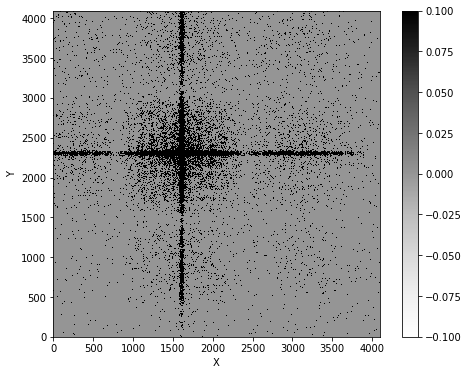

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('X')
ax.set_ylabel('Y')
im=ax.imshow(new_data.T,cmap='Greys',origin='low')
cbar = fig.colorbar(im, ax=ax)
im.set_clim(np.percentile(data.flatten(),20),np.percentile(data.flatten(),98))
#im.set_clim(0,3)
plt.show()

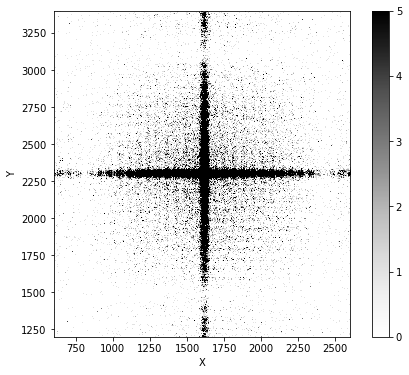

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(600, 2600)
ax.set_ylim(1200, 3400)
im=ax.imshow(new_data.T,cmap='Greys',origin='low')
cbar = fig.colorbar(im, ax=ax)
#im.set_clim(np.percentile(data.flatten(),20),np.percentile(data.flatten(),98))
im.set_clim(0,5)
plt.show()